In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
os.chdir(r'C:\Users\Bushra Ansari\Desktop\LMS_DATASET\SVM\Predicting Term Deposit Subscription by a client')

In [3]:
os.listdir()

['bank-additional-full.csv', 'Problem Statement_SVM.pdf']

In [4]:
bank = pd.read_csv('bank-additional-full.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [5]:
bank.shape

(41188, 21)

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
print(bank.duplicated().sum())
bank.shape

12


(41188, 21)

In [8]:
bank = bank.drop_duplicates()
bank.shape

(41176, 21)

#### Target Variable

In [9]:
bank['y'].value_counts(dropna=True)

no     36537
yes     4639
Name: y, dtype: int64

In [10]:
bank['y'].replace({'no' : '0', 'yes' : '1'}, inplace = True)

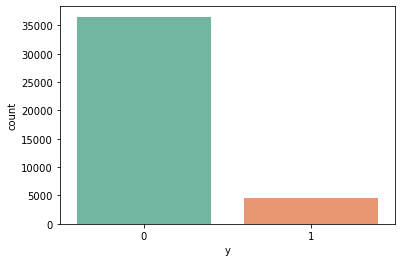

In [11]:
sns.countplot(x = bank['y'], data = bank, palette = 'Set2')
plt.show()

From above countplot, we can see that data is imbalanced.

#### Categorical Predictors

In [12]:
bank.dtypes[bank.dtypes == 'object'].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [13]:
bank['job'].value_counts(dropna=True)

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [14]:
bank['job'] = bank['job'].replace(['management', 'admin.'], 'White-collar')

bank['job'] = bank['job'].replace(['services', 'housemaid'], 'Pink-collar')

bank['job'] = bank['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'Others')

bank['job'] = bank['job'].replace(['self-employed', 'entrepreneur'], 'Self-depend')

In [15]:
bank['job'].unique()

array(['Pink-collar', 'White-collar', 'blue-collar', 'technician',
       'Others', 'Self-depend'], dtype=object)

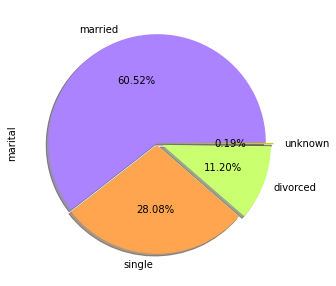

In [16]:
bank['marital'].value_counts(dropna=True).plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], 
             explode = [0,0.02,0.05,0.07],colors = ['#AB82FF', '#FFA54F','#CAFF70', '#CDCD00'], shadow = True)
plt.show()

In [17]:
bank['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [18]:
bank['education'] = bank['education'].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'primary')

bank['education'] = bank['education'].replace([ 'high.school'], 'secondary')

bank['education'] = bank['education'].replace(['university.degree', 'professional.course'], 'teritary')


In [19]:
bank['education'].unique()

array(['primary', 'secondary', 'teritary', 'unknown', 'illiterate'],
      dtype=object)

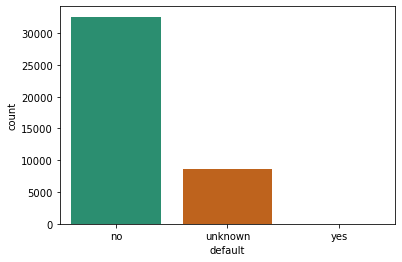

In [20]:
sns.countplot(x = bank['default'], data = bank, palette = 'Dark2')
plt.show()

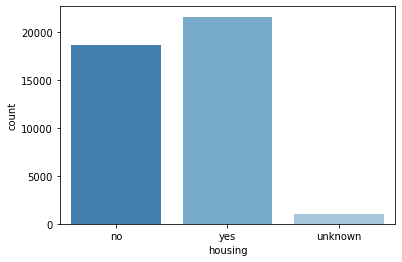

In [21]:
sns.countplot(x = bank['housing'], data = bank, palette = 'tab20c')
plt.show()

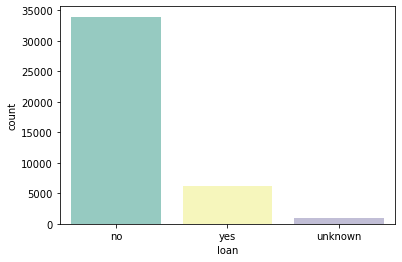

In [22]:
sns.countplot(x = bank['loan'], data = bank, palette = 'Set3')
plt.show()

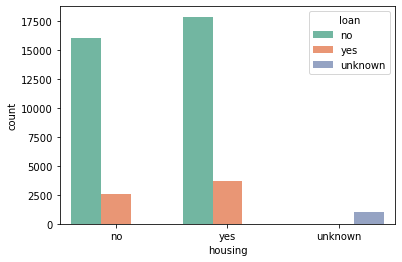

In [23]:
sns.countplot(x = bank['housing'], data = bank, hue = 'loan', palette = 'Set2')
plt.show()

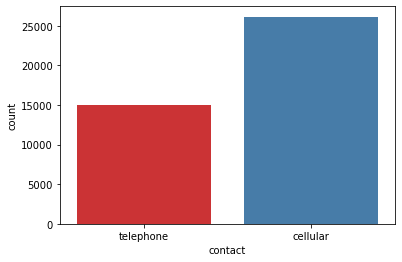

In [24]:
sns.countplot(x = bank['contact'], data = bank, palette = 'Set1')
plt.show()

In [25]:
# chi square contact & poutcome to check whether keep contact or not
ContactPoutcome = pd.crosstab(bank.contact, bank.poutcome, rownames=['contact'], colnames=['poutcome'])
ContactPoutcome

poutcome,failure,nonexistent,success
contact,,,
cellular,3952,20913,1270
telephone,300,14638,103


In [26]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(ContactPoutcome)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject Ho)')
else:
    print('Independent (Ho holds true)')
    
# Since dependent, we'll keep the variable

p value is 0.0
Dependent (reject Ho)


In [27]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [28]:
bank['month'] = bank['month'].replace(['mar'], 'Quarter1')

bank['month'] = bank['month'].replace(['apr', 'may', 'jun'], 'Quarter2')

bank['month'] = bank['month'].replace(['jul', 'aug', 'sep'], 'Quarter3')

bank['month'] = bank['month'].replace(['oct', 'nov', 'dec'], 'Quarter4')

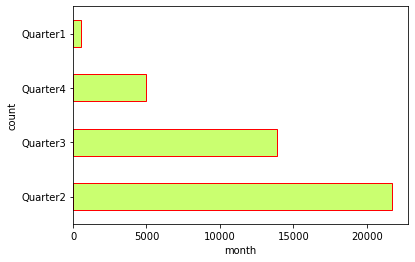

In [29]:
bank['month'].value_counts().plot(kind = 'barh', color = '#CAFF70', edgecolor = 'r')
plt.xlabel('month')
plt.ylabel('count')
plt.show()

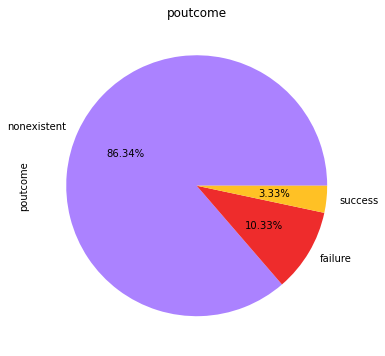

In [30]:
bank['poutcome'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [6,6],
                                    colors = ['#AB82FF', '#EE2C2C', '#FFC125'])
plt.title('poutcome')
plt.show()

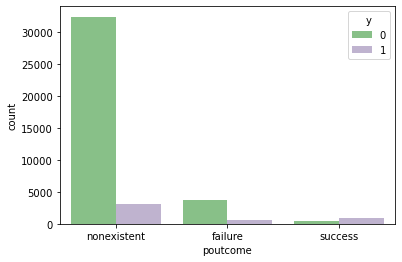

In [31]:
sns.countplot(x = bank['poutcome'], data = bank, hue = 'y', palette = 'Accent')
plt.show()

In [32]:
bank['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

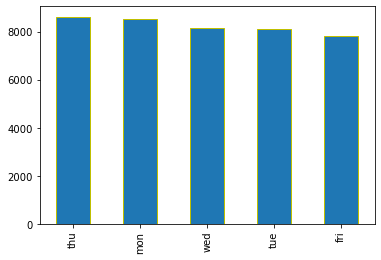

In [33]:
bank['day_of_week'].value_counts().plot(kind = 'bar', edgecolor = 'y')
plt.show()

As people are buying term deposits on any day of the week as counts are almost equal for all weekdays. Therefore, we can drop 'day_of_week' column.

In [34]:
bank.drop(['day_of_week'], axis = 1, inplace = True)

#### Numerical Predictors

In [35]:
bank.dtypes[bank.dtypes != 'object'].index

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

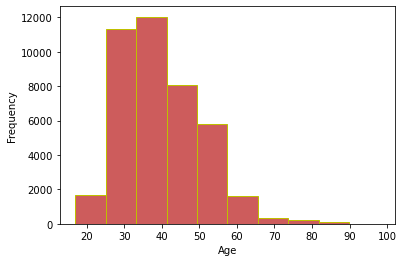

In [36]:
bank['age'].plot(kind = 'hist', y = 'Frequency', color = '#CD5C5C', edgecolor = 'y' )
plt.xlabel('Age')
plt.show()

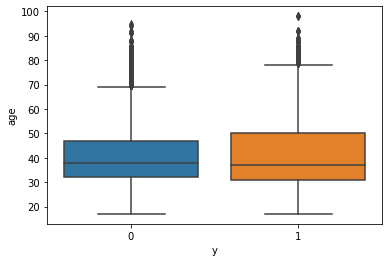

In [37]:
sns.boxplot(x = 'y', y = 'age', data = bank)
plt.show()

Boxplot for both the classes overlap quite a lot which means that age is not necessarily a good indicator for which customer will subscribe and which customer will not to term deposit.

C:\Users\Bushra Ansari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

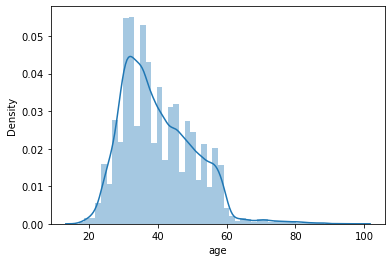

In [38]:
sns.distplot(bank['age'])

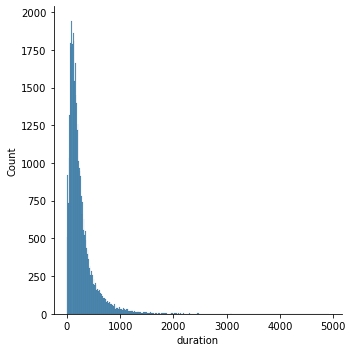

In [39]:
sns.displot(bank['duration'])
plt.show()

In [40]:
bank['duration'].max()/60/60

1.366111111111111

In [41]:
bank['duration'].var()

67239.24947519663

C:\Users\Bushra Ansari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


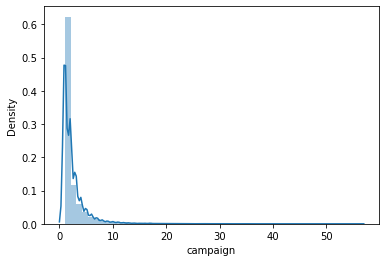

In [42]:
sns.distplot(bank['campaign'])
plt.show()

C:\Users\Bushra Ansari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


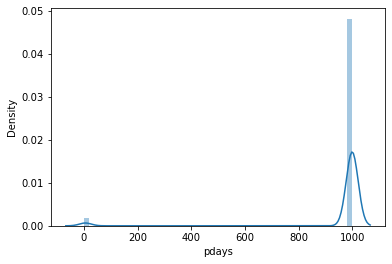

In [43]:
sns.distplot(bank['pdays'])
plt.show()

In [44]:
bank['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [45]:
bank['recent_pdays'] = 1/ bank['pdays'] # Values divided by 1 so that recently called ones have big values and other has
# small values for easy comparison

bank.drop(columns = ['pdays'], inplace = True)

In [46]:
bank['recent_pdays'].value_counts()

0.001001    39661
0.333333      439
0.166667      412
0.250000      118
0.111111       64
0.500000       61
0.142857       60
0.083333       58
0.100000       52
0.200000       46
0.076923       36
0.090909       28
1.000000       26
0.066667       24
0.071429       20
0.125000       18
inf            15
0.062500       11
0.058824        8
0.055556        7
0.045455        3
0.052632        3
0.047619        2
0.040000        1
0.038462        1
0.037037        1
0.050000        1
Name: recent_pdays, dtype: int64

In [47]:
bank['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [48]:
bank['previous'].value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [49]:
bank['emp.var.rate'].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

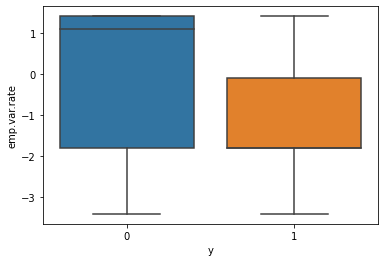

In [50]:
sns.boxplot(x = 'y', y = 'emp.var.rate', data = bank)
plt.show()

C:\Users\Bushra Ansari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


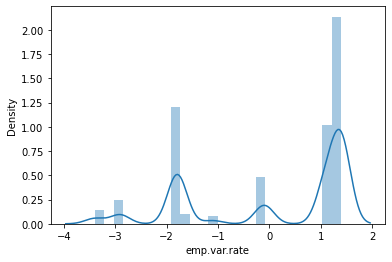

In [51]:
sns.distplot(bank['emp.var.rate'])
plt.show()

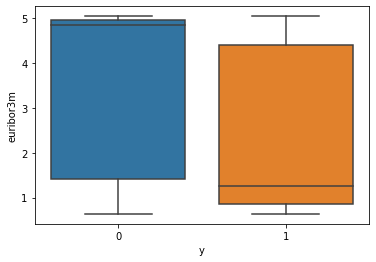

In [52]:
sns.boxplot(x = 'y', y = 'euribor3m', data = bank)
plt.show()

#### Checking Correlation

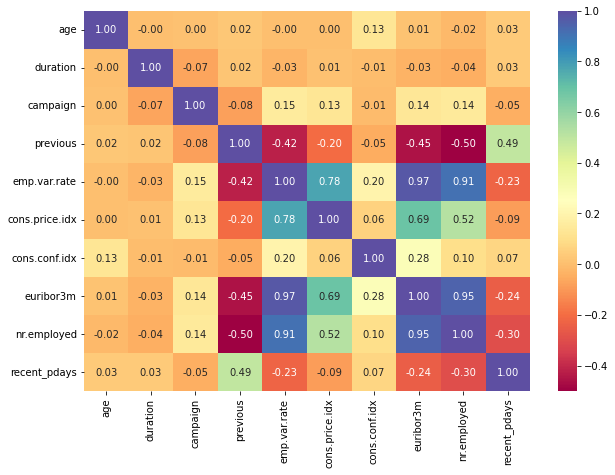

In [53]:
corr = bank.corr()
plt.figure(figsize = [10,7])
sns.heatmap(corr, annot = True, cmap = 'Spectral', fmt = '0.2f')
plt.show()

The emp.var.rate, cons.price.idx, euribor3m and nr.employed features have very high correlation. With euribor3m and nr.employed having the highest correlation of 0.95.

#### Checking missing values

In [54]:
def missingValues(data):
    m=data.isnull().sum()
    md=(data.isnull().sum()/ data.shape[0]*100)
    df=pd.concat([m, md], axis=1, keys=["Missing", "Percentage"])
    fg=df.sort_values(by ="Percentage", ascending=False)
    fg1=fg[fg["Percentage"]>0]
    return fg1

missingValues(bank)

,Missing,Percentage


No missing values.

#### Checking Outliers

In [55]:
bank.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,41176.0,40.023800,10.420680,17.000000,23.000000,24.000000,25.000000,25.000000,26.000000,28.000000,32.000000,38.000000,47.000000,55.000000,58.000000,59.000000,59.000000,62.000000,71.000000,98.000
duration,41176.0,258.315815,259.305321,0.000000,11.000000,17.000000,23.000000,29.000000,36.000000,59.000000,102.000000,180.000000,319.000000,551.000000,753.000000,821.000000,911.000000,1052.500000,1271.250000,4918.000
campaign,41176.0,2.567879,2.770318,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,7.000000,8.000000,9.000000,11.000000,14.000000,56.000
previous,41176.0,0.173013,0.494964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400000,-3.400000,-3.400000,-3.000000,-2.900000,-2.900000,-1.800000,-1.800000,1.100000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201000,92.201000,92.379000,92.431000,92.469000,92.713000,92.893000,93.075000,93.749000,93.994000,94.465000,94.465000,94.465000,94.465000,94.465000,94.465000,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800000,-49.500000,-47.100000,-47.100000,-47.100000,-47.100000,-46.200000,-42.700000,-41.800000,-36.400000,-36.100000,-33.600000,-31.400000,-31.400000,-30.100000,-26.900000,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634000,0.658000,0.714000,0.720000,0.740000,0.797000,1.046000,1.344000,4.857000,4.961000,4.964000,4.966000,4.967000,4.967000,4.968000,4.968000,5.045
nr.employed,41176.0,5167.017972,72.177913,4964.000000,4964.000000,4992.000000,4992.000000,5009.000000,5018.000000,5076.000000,5099.000000,5191.000000,5228.000000,5228.000000,5228.000000,5228.000000,5228.000000,5228.000000,5228.000000,5228.000
recent_pdays,41176.0,inf,NaN,0.001001,0.001001,0.001001,0.001001,0.001001,0.001001,0.001001,0.001001,0.001001,0.001001,0.001001,0.001001,0.001001,0.111111,0.166667,0.333333,inf


#### Outliers Treatment

In [56]:
def outliers(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x 

In [57]:
numerical_var = bank.dtypes[bank.dtypes != "object"].index
data_num = bank[numerical_var]

In [58]:
data_num1 = data_num.apply(lambda x : outliers(x))

In [59]:
categorical_var = bank.dtypes[bank.dtypes == "object"].index
data_cat = bank[categorical_var]

In [60]:
bank1 = pd.concat([data_cat, data_num1], axis = 1)

#### Creating Dummies

In [61]:
bank1.shape

(41176, 20)

In [62]:
cleaned_bank = pd.get_dummies(bank1, drop_first=True)

In [63]:
cleaned_bank.shape

(41176, 35)

In [64]:
cleaned_bank.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'recent_pdays', 'job_Pink-collar', 'job_Self-depend',
       'job_White-collar', 'job_blue-collar', 'job_technician',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_primary', 'education_secondary', 'education_teritary',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_Quarter2', 'month_Quarter3',
       'month_Quarter4', 'poutcome_nonexistent', 'poutcome_success', 'y_1'],
      dtype='object')

In [65]:
bank['y'].value_counts(normalize=True)
#Imbalanced data problem

0    0.887337
1    0.112663
Name: y, dtype: float64

In [66]:
x = cleaned_bank.drop(columns = ['y_1'])
y = cleaned_bank['y_1']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

#### Feature Scaling

In [68]:
sc = StandardScaler()
sc_fit = sc.fit(x_train)

x_train_sc = sc_fit.transform(x_train)
x_test_sc = sc_fit.transform(x_test)

In [69]:
x_train_sc_df = pd.DataFrame(x_train_sc, columns=x_train.columns)
x_test_sc_df = pd.DataFrame(x_test_sc, columns=x_test.columns)

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Var'] = x_train_sc_df.columns
vif_data['VIF'] = [variance_inflation_factor(x_train_sc_df.values, i) for i in range(len(x_train_sc_df.columns))]

C:\Users\Bushra Ansari\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [73]:
vif_data.sort_values(by = ['VIF'], ascending = False)

,Var,VIF
24,housing_unknown,inf
26,loan_unknown,inf
20,education_teritary,576.238703
18,education_primary,498.932665
19,education_secondary,419.931599
7,euribor3m,129.870843
21,education_unknown,94.465111
4,emp.var.rate,63.838491
8,nr.employed,41.323692
29,month_Quarter2,20.674980


#### Imbalanced Data Treatment with RandomUnderSampler

In [71]:
!pip install imblearn

In [74]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(replacement=False, sampling_strategy=.6)

x_under, y_under = undersample.fit_resample(x_train_sc_df, y_train)

In [75]:
from collections import Counter

print('Before sampling class distribution:-',Counter(y_train))

print('New class distribution:-',Counter(y_under))

Before sampling class distribution:- Counter({0: 29268, 1: 3672})
New class distribution:- Counter({0: 6120, 1: 3672})


In [76]:
def new_ratio(y):
    zero=len(y)-y.sum()
    one=y.sum()
    rro=round(((one/len(y))*100),2)
    rrz=round(((zero/len(y))*100),2)
    print(f"Class ratio 1 ({one}) :0 ({zero}) is {rro}% : {rrz}%")

In [77]:
new_ratio(y_under)

Class ratio 1 (3672) :0 (6120) is 37.5% : 62.5%


### Support Vector Macine

In [78]:
# Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

params1 = {"kernel":['linear', 'poly', 'rbf'],
       "degree":[1,2,3],
       "gamma":[0.1,1,.001],
       "C":[0.1,1,10]}

sv1 = svm.SVC()
svm_class1 = RandomizedSearchCV(sv1, params1, cv=3, n_jobs=-1, verbose=True)
svm_class1.fit(x_under, y_under)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'degree': [1, 2, 3],
                                        'gamma': [0.1, 1, 0.001],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   verbose=True)

In [79]:
print("Best roc auc score : ", svm_class1.best_score_)
print(svm_class1.best_estimator_)

Best roc auc score :  0.8585580065359477
SVC(C=1, degree=1, gamma=0.1, kernel='poly')


In [83]:
# Model with optimal hyperparameters
import time

st = time.time()

sv3 = svm.SVC(kernel="rbf", degree=2, gamma=0.01, C=10, probability=True)

sv3.fit(x_under, y_under)

print("Train score :", sv3.score(x_under, y_under))
print("Test score :", sv3.score(x_test_sc_df, y_test))

et = time.time()
print("Time Taken", et-st, "sec")

Train score : 0.8896037581699346
Test score : 0.8725109276347741
Time Taken 14.493157863616943 sec


#### Model Evaluation

In [84]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(metrics.f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {metrics.classification_report(y_test, y_pred)}")

In [90]:
# Predictions on the train set
y_train_pred1 = sv3.predict(x_under)
display_scores(y_under, y_train_pred1)

F1 Score: 85.89%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      6120
           1       0.82      0.90      0.86      3672

    accuracy                           0.89      9792
   macro avg       0.88      0.89      0.88      9792
weighted avg       0.89      0.89      0.89      9792



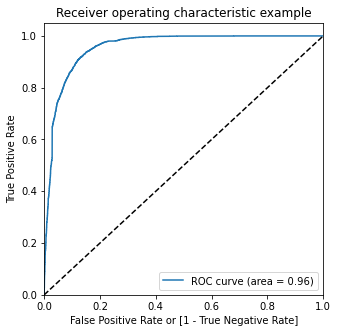

In [91]:
# Predicted probability
y_train_pred_proba1 = sv3.predict_proba(x_under)[:,1]
# Plot the ROC curve
draw_roc(y_under, y_train_pred_proba1)

In [92]:
# Evaluating model on the test data
y_test_pred1 = sv3.predict(x_test_sc_df)
display_scores(y_test, y_test_pred1)

F1 Score: 61.82%
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      7269
           1       0.48      0.88      0.62       967

    accuracy                           0.87      8236
   macro avg       0.73      0.88      0.77      8236
weighted avg       0.92      0.87      0.89      8236



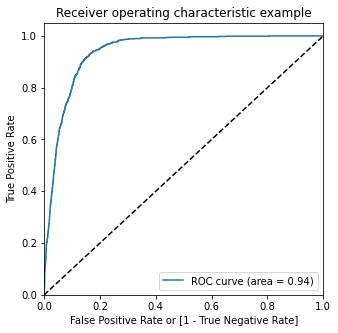

In [93]:
# Predicted probability
y_test_pred_proba1 = sv3.predict_proba(x_test_sc_df)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba1)

In [94]:
tmp2 = pd.Series({'Model': " Support Vector Machine  ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_test_pred1),
                 'Precision Score': metrics.precision_score(y_test, y_test_pred1),
                 'Recall Score': metrics.recall_score(y_test, y_test_pred1),
                 'F1 Score' : metrics.f1_score(y_test, y_test_pred1),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_test_pred1)})

model_svm_imb_report = model_report.append(tmp2, ignore_index = True)
model_svm_imb_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Support Vector Machine,0.875327,0.476725,0.879007,0.618182,0.872511


The performance metric used for this case study is AUC ROC score also known as AUROC (Area Under the Receiver Operating Characteristics).


The reason we are choosing AUC over accuracy is because,
as we will see in Exploratory data analysis, the dataset we are working with is an imbalanced dataset with the class “no” being the majority class. If we use accuracy as our metric, any random model can give us a very good accuracy. But at the end, it will be a random model. AUC gets over this problem by looking into both the True positive rate (TPR) and False positive rate (FPR). Only if both the TPR and FPR are well above the random line in the ROC curve, we will get a good AUC. Accuracy does not guarantee that.